In [31]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("/Users/laxmanjeergal/Desktop/ml/cell_images"))

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

['.DS_Store', 'Parasitized', 'Uninfected']


In [30]:
import cv2
from os import listdir
import imageio

IMG_SHAPE = 50

# cell labels are 1 if infected, 0 if uninfected.
cell_labels = []

# cells 
cell_images = []

#first six infected and unfected cells for visualization only
infected_cells = []
uninfected_cells = []

#listdir("../input/cell_images/cell_images/")
base_path = "/Users/laxmanjeergal/Desktop/ml/cell_images/"

#get infected cells
infected_path = base_path +'Parasitized/'
for file in listdir(infected_path):
    if file.endswith('.png'):
        file_path = infected_path + file
        image = imageio.imread(file_path)
        image = cv2.resize(image,(IMG_SHAPE,IMG_SHAPE)).astype('float32')/255.0
        infected_cells.append(image)
        cell_images.append(image)
        cell_labels.append(1)
        
uninfected_path = base_path +'Uninfected/'
for file in listdir(uninfected_path):
    if file.endswith('.png'):
        file_path = uninfected_path + file
        image = imageio.imread(file_path) 
        image = cv2.resize(image,(IMG_SHAPE,IMG_SHAPE)).astype('float32')/255.0   
        uninfected_cells.append(image)
        cell_images.append(image)
        cell_labels.append(0)

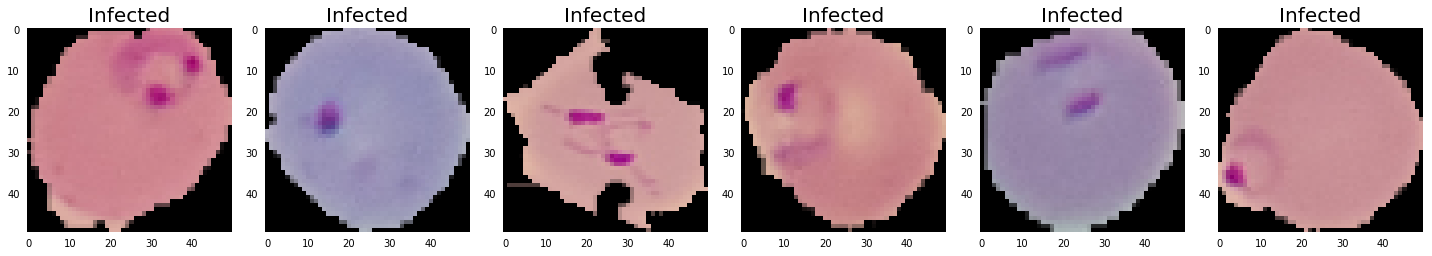

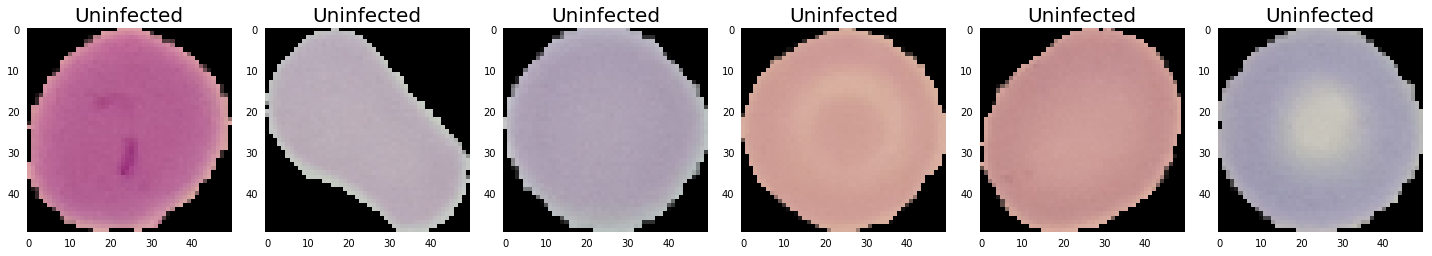

In [29]:
def ShowFirstSix(images_arr,title):

    fig, axes = plt.subplots(1, 6, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()
ShowFirstSix(infected_cells,'Infected')
ShowFirstSix(uninfected_cells,'Uninfected')


In [14]:
classifier = Sequential()


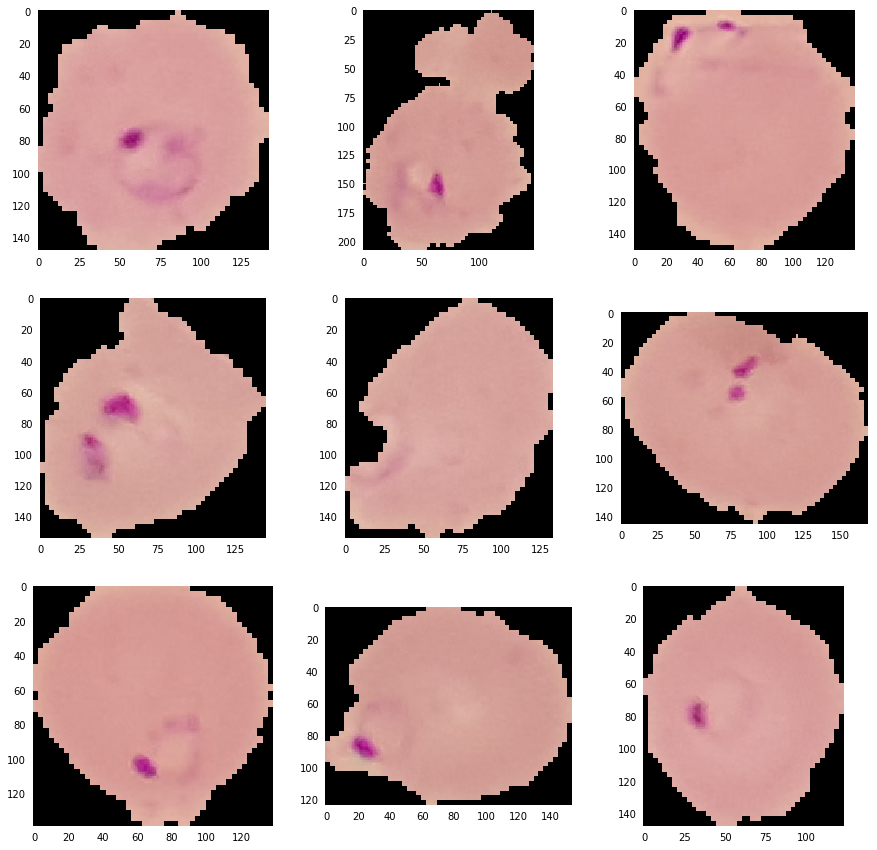

In [13]:
im_list = [162+i for i in range(9)]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in enumerate(im_list):
    img = plt.imread("/Users/laxmanjeergal/Desktop/ml/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_"+str(i[1])+".png")
    ax=axes[i[0]//3,i[0]%3]
    ax.imshow(img)           
    

In [15]:
#Adding 1st Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Flattening
classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
parasite_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
uninfected_datagen = ImageDataGenerator(rescale=1./255)
parasite_data = parasite_datagen.flow_from_directory('/Users/laxmanjeergal/Desktop/ml/cell_images',
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode = 'binary')
uninfected_data = uninfected_datagen.flow_from_directory('/Users/laxmanjeergal/Desktop/ml/cell_images',
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode = 'binary')

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [17]:
accuracies = classifier.fit_generator(parasite_data,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = uninfected_data,
                         validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 32s 322ms/step - loss: 0.6906 - acc: 0.5141 - val_loss: 0.6464 - val_acc: 0.6275
Epoch 2/30
100/100 [==============================] - 30s 299ms/step - loss: 0.4412 - acc: 0.8159 - val_loss: 0.2489 - val_acc: 0.9137
Epoch 3/30
100/100 [==============================] - 30s 296ms/step - loss: 0.2459 - acc: 0.9113 - val_loss: 0.2329 - val_acc: 0.9069
Epoch 4/30
100/100 [==============================] - 29s 292ms/step - loss: 0.2045 - acc: 0.9319 - val_loss: 0.1516 - val_acc: 0.9506
Epoch 5/30
100/100 [==============================] - 29s 285ms/step - loss: 0.2203 - acc: 0.9253 - val_loss: 0.1620 - val_acc: 0.9525
Epoch 6/30
100/100 [==============================] - 28s 277ms/step - loss: 0.1853 - acc: 0.9419 - val_loss: 0.1585 - val_acc: 0.9569
Epoch 7/30
100/100 [==============================] - 27s 275ms/step - loss: 0.1765 - acc: 0.9444 - val_loss: 0.1618 - val_acc: 0.9500
Epoch 8

In [18]:
acc = pd.DataFrame.from_dict(accuracies.history)
acc = pd.concat([pd.Series(range(0,30),name='epochs'),acc],axis=1)
acc.head()



,epochs,val_loss,val_acc,loss,acc
0,0,0.646384,0.627500,0.690635,0.514062
1,1,0.248884,0.913750,0.441200,0.815937
2,2,0.232905,0.906875,0.245917,0.911250
3,3,0.151601,0.950625,0.204487,0.931875
4,4,0.162000,0.952500,0.220337,0.925312


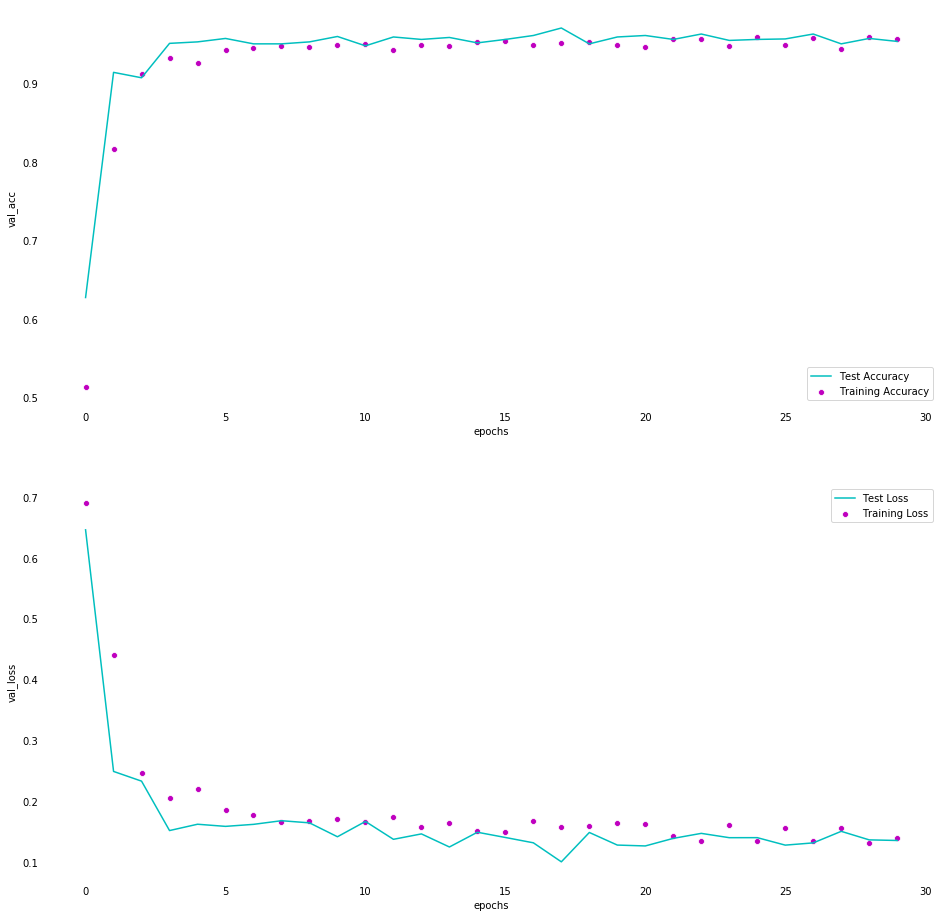

In [19]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='acc',data=acc,ax=ax,color='m')
sns.lineplot(x='epochs',y='val_acc',data=acc,ax=ax,color='c')
sns.scatterplot(x='epochs',y='loss',data=acc,ax=ax1,color='m')
sns.lineplot(x='epochs',y='val_loss',data=acc,ax=ax1,color='c')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])